In [7]:
import numpy as np
from pylab import arange, show, cm
import pandas as pd
import healpy as hp
import h5py
import glob
import time

import matplotlib.pyplot as plt
import matplotlib
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

In [2]:
# different image location
# images =glob.glob("fits/*.fits")

# Different location 
beam_file = "/home/kuiack/AARTFAAC_beamsim/LBAOUTER_AARTFAAC_beamshape_60MHz.hdf5"
beam_model = np.array(h5py.File(beam_file).get('lmbeamintensity_norm'))

In [26]:
# A6 

meshx, meshy = np.meshgrid(np.linspace(0,1023,1024),np.linspace(0,1023,1024))


In [3]:
# A12

import scipy.ndimage

meshx, meshy = np.meshgrid(np.linspace(0,2100,2100),
                           np.linspace(0,2100,2100))

beam_model = scipy.ndimage.zoom(beam_model, 2.05078125, order=3)

In [4]:
image_list = sorted(glob.glob("/home/kuiack/a12/*"))
# image_list = np.append(image_list,sorted(glob.glob("/mnt/ads001/A12_slices/slices/*.fits"))[:-1])

print len(image_list)
# for i in image_list:
#     print i



8


In [5]:
NSIDE = 512

hp_index = np.arange(hp.nside2npix(NSIDE))

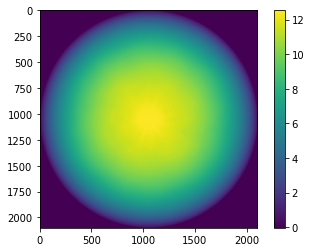

In [6]:
# beam_model[beam_model<5] *=0
plt.imshow(beam_model)
plt.colorbar()

/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.
/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()
/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if sys.path[0] == '':


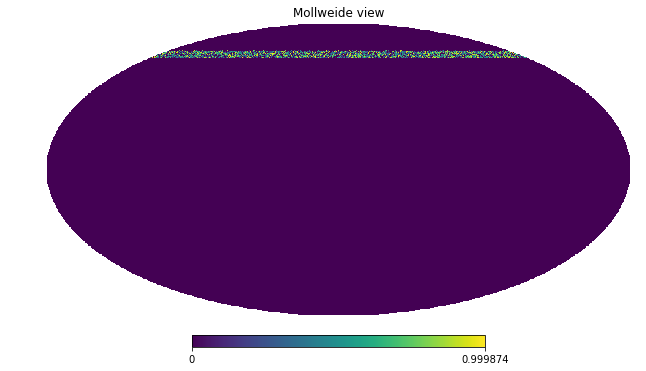

In [3]:
import numpy as np
import pandas as pd 
import healpy as hp
import matplotlib 
%matplotlib inline

NSIDE = 512 # defines output map resolution 

data = pd.read_csv("datafile.csv")

_map = np.zeros(hp.nside2npix(NSIDE))
_map[hp.pixelfunc.ang2pix(NSIDE, 
                          data["Ra"], data["DEC"], 
                          lonlat=True)] += data["X"]

hp.mollview(_map)



In [10]:
np.random.rand(1000)

array([ 0.56641506,  0.24158594,  0.80620484,  0.52795684,  0.93175916,
        0.25423155,  0.50824315,  0.04099262,  0.67205275,  0.57065554,
        0.48790259,  0.95589258,  0.5754019 ,  0.2230226 ,  0.53838706,
        0.52680118,  0.85854559,  0.1034324 ,  0.43630801,  0.54009199,
        0.50309442,  0.48218432,  0.37952929,  0.91486808,  0.53355471,
        0.36799543,  0.4111278 ,  0.71659165,  0.33260082,  0.56670154,
        0.73705849,  0.56708362,  0.62819281,  0.72423861,  0.4853791 ,
        0.54683158,  0.70574288,  0.15054159,  0.6946094 ,  0.924423  ,
        0.98765937,  0.06305905,  0.64765763,  0.76069631,  0.45051251,
        0.35534541,  0.19678469,  0.32994774,  0.09980679,  0.63600487,
        0.45379959,  0.00762926,  0.15523945,  0.54876126,  0.77175259,
        0.80717857,  0.57378439,  0.70550394,  0.92112035,  0.81167491,
        0.58149175,  0.43321686,  0.59420734,  0.70555155,  0.88302147,
        0.28965378,  0.46266884,  0.15413757,  0.70320979,  0.63

In [6]:

sky_map = pd.DataFrame({"idotw":np.zeros(len(hp_index)), 
                        "i":np.zeros(len(hp_index)),
                        "w":np.zeros(len(hp_index)), 
                        "n":np.zeros(len(hp_index))}, index = hp_index )



n = 1
for _img in np.array(image_list):
    t1 = time.time()
    
    image_wcs = WCS(_img)
    tmp_img = np.array(fits.open(_img)[0].data[0,0,:,:],dtype=np.float)
    tmp_img[tmp_img < -5] *= np.nan
    ra, dec,notused, nnotused = image_wcs.wcs_pix2world(meshx,meshy,1,1,1)
    
    index = (np.isfinite(tmp_img) & np.isfinite(dec) & np.isfinite(ra) & (beam_model != 0.0))
    
    pix_index = hp.pixelfunc.ang2pix(NSIDE,ra[index],dec[index],lonlat=True)    
    
    
    
    sky_map.at[pix_index, "idotw"] = sky_map.iloc[pix_index]["idotw"] + tmp_img[index]*beam_model[index]
    sky_map.at[pix_index, "i"] = sky_map.iloc[pix_index]["i"] + tmp_img[index]
    sky_map.at[pix_index, "w"] = sky_map.iloc[pix_index]["w"] + beam_model[index]
    sky_map.at[pix_index, "n"] = sky_map.iloc[pix_index]["n"] + np.ones(len(beam_model[index]))
    print n,"/", len(image_list), time.time() - t1
    n += 1

# hp.write_map("/home/kuiack/A12_map_2.fits", (sky_map["idotw"]/sky_map["w"]))

1 / 8 5.25457596779
2 / 8 4.38308405876


/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


3 / 8 4.14252614975


IOError: Header missing END card.

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16
       }

matplotlib.rc('font', **font)

m = (sky_map["idotw"]/sky_map["w"])

# for i in  np.arange(0,360,5):
plt.figure(1, figsize=(11.69,8.27))



cmap = cm.YlGnBu_r
cmap.set_under('w')
cmap.set_bad('w')

hp.mollview(m, cmap=cmap, title="The AARTFAAC-12 sky", fig=1,
            min=np.mean(m)-0.5*np.std(m),
            max=np.mean(m)+1.5*np.std(m),rot=[0,0,0], cbar=False)

hp.graticule(5)
plt.tight_layout()
# plt.savefig('/home/kuiack/a12/a12_map-a4.eps')
plt.show()


In [49]:
 np.arange(0,360,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350])

In [47]:
mkdir ~/a12/pngs

In [19]:
np.sym

14.61722919170861

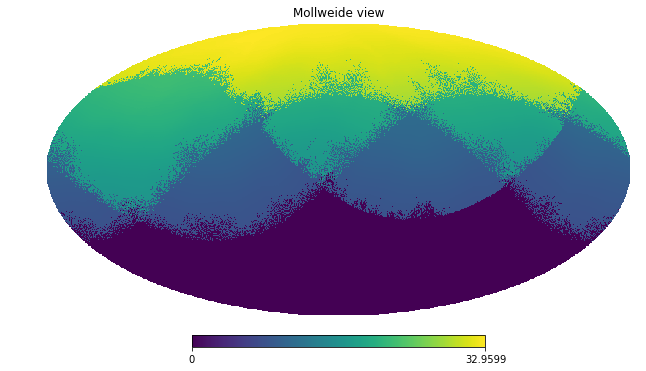

In [31]:
hp.mollview(sky_map["w"], )

In [175]:
hp.mollview?

In [176]:
image_list

['/data/ASf_20190127-2/2019-01-26T13:59:27-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T00:18:45-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T00:35:32-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T00:52:18-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:09:05-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:25:52-S316.7-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:42:38-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T01:59:25-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T02:16:12-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T02:32:58-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T02:49:45-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:06:31-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:23:21-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:40:09-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T03:57:03-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T04:13:59-S316.5-B8.fits',
 '/data/ASf_20190127-2/2019-01-27T04:30:

In [177]:
hp.write_map("ASf_20190127.fits", m)

In [179]:
pwd

u'/afhome/kuiack/scratchpad/notebooks'